In [1]:
import pandas as pd
import numpy as np
import os
import shelve

In [116]:
##Carrega informações do fundos
filename='itau_phoenix.out'
my_shelf = shelve.open(filename)
for k in my_shelf.keys():
    globals()[k] = my_shelf[k]
    
#Valores a pagar são negativos
q = carteira.TP_APLIC == 'Valores a pagar'
carteira.loc[q, ['VL_MERC_POS_FINAL', 'peso']] *= -1

In [117]:
carteira.columns

Index(['Id', 'AG_RISCO', 'BV_MERC', 'CD_ATIVO', 'CD_ATIVO_BV_MERC',
       'CD_BV_MERC', 'CD_INDEXADOR_POSFX', 'CD_ISIN', 'CD_PAIS', 'CD_SELIC',
       'CD_SWAP', 'CNPJ_EMISSOR', 'CNPJ_FUNDO', 'CNPJ_FUNDO_COTA',
       'CPF_CNPJ_EMISSOR', 'DENOM_SOCIAL', 'DS_ATIVO', 'DS_ATIVO_EXTERIOR',
       'DS_INDEXADOR_POSFX', 'DS_SWAP', 'DT_COMPTC', 'DT_CONFID_APLIC',
       'DT_EMISSAO', 'DT_FIM_VIGENCIA', 'DT_INI_VIGENCIA', 'DT_RISCO',
       'DT_VENC', 'EMISSOR', 'EMISSOR_LIGADO', 'GRAU_RISCO', 'INVEST_COLETIVO',
       'INVEST_COLETIVO_GESTOR', 'NM_FUNDO_COTA', 'PAIS', 'PF_PJ_EMISSOR',
       'PR_CUPOM_POSFX', 'PR_INDEXADOR_POSFX', 'PR_TAXA_PREFX',
       'QT_AQUIS_NEGOC', 'QT_ATIVO_EXTERIOR', 'QT_POS_FINAL', 'QT_VENDA_NEGOC',
       'RISCO_EMISSOR', 'TITULO_POSFX', 'TITULO_CETIP', 'TITULO_GARANTIA',
       'CNPJ_INSTITUICAO_FINANC_COOBR', 'TP_APLIC', 'TP_ATIVO', 'TP_FUNDO',
       'TP_NEGOC', 'TP_TITPUB', 'FILE', 'VL_AQUIS_NEGOC', 'VL_ATIVO_EXTERIOR',
       'VL_CUSTO_POS_FINAL', 'VL_MERC_PO

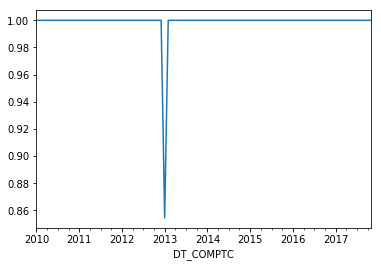

In [135]:
#os ativos somam 1 todos os meses?
q = carteira.groupby('DT_COMPTC').peso.sum()
q.plot()
#porque em 31/01/2013 o peso soma só 0.85? Faltam 7MM de patrimônio líquido. operações compromissadas?

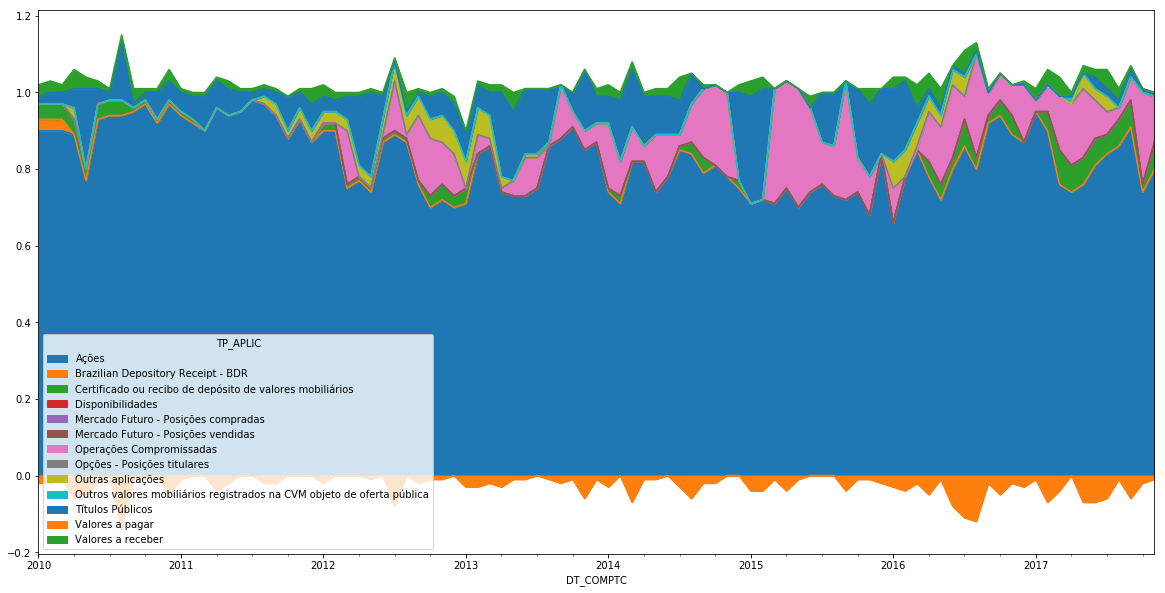

In [133]:
carteira.groupby(['DT_COMPTC','TP_APLIC'])['peso'].sum().round(2).unstack().plot.area(figsize=(20,10))

In [136]:
pivot_cols = carteira.CD_ATIVO\
            .fillna(carteira.CD_ISIN)\
            .fillna(carteira.CD_ATIVO_BV_MERC)\
            .fillna(carteira[carteira.FILE.str.contains('BLC_8') & carteira.TP_ATIVO.str.contains("Ação|Opção")].DS_ATIVO.str.extract(r'([A-Z]+\d+)', expand=False))\
            .fillna(carteira[carteira.FILE.str.contains('BLC_8')].DS_ATIVO.str.extract(r'(BR[A-Z0-9]+)', expand=False))\
            .fillna(carteira.TP_APLIC)
            #.fillna(carteira[carteira.FILE.str.contains('BLC_8')].DS_ATIVO.str.extract(r'(DI1[A-Z0-9]+)', expand=False))\
            #.fillna(carteira[carteira.FILE.str.contains('BLC_8')].DS_ATIVO.str.extract(r'(DOL[A-Z0-9]+)', expand=False))\
            #.fillna(carteira[carteira.TP_ATIVO.str.contains("Ação").fillna(False)].DS_ATIVO.str.extract(r'([A-Z]+\d+)', expand=False))\
            #.fillna(carteira[carteira.TP_ATIVO.str.contains("Opção").fillna(False)].DS_ATIVO.str.extract(r'([A-Z]+\d+)', expand=False))\
            
            #.fillna(carteira.DS_ATIVO.str.extract(r'(^DI1[A-Z]{2}\d{2})', expand=False))\
            #.fillna(carteira.DS_ATIVO.str.extract(r'(^DOL.+)', expand=False))\
            #.fillna(carteira.CD_INDEXADOR_POSFX)
pesos = carteira.pivot_table(index='DT_COMPTC', columns=pivot_cols, values='peso', aggfunc='sum')

['AALR3',
 'ABEV3',
 'ABNB3',
 'AEDU3',
 'ALSC3',
 'AMAR3',
 'AMBV4',
 'AMIL3',
 'ANIM3',
 'AUTM3',
 'AZUL4',
 'BBAS3',
 'BBDC4',
 'BBRK3',
 'BBSE3',
 'BEEF3',
 'BISA3',
 'BPHA3',
 'BRADESCO',
 'BRAP4',
 'BRASIL',
 'BRE11',
 'BRFS3',
 'BRIN3',
 'BRKM5',
 'BRML3',
 'BRPR3',
 'BRSR6',
 'BRSTNCLF1QD4',
 'BRSTNCLF1QE2',
 'BRSTNCLF1QG7',
 'BRSTNCLF1QH5',
 'BRSTNCLF1QI3',
 'BRSTNCLF1QJ1',
 'BRSTNCLF1QK9',
 'BRSTNCLF1QL7',
 'BRSTNCLF1QM5',
 'BRSTNCLF1QN3',
 'BRSTNCLF1QO1',
 'BRSTNCLF1QP8',
 'BRSTNCLF1QQ6',
 'BRSTNCLF1QR4',
 'BRSTNCLF1QS2',
 'BRSTNCLF1QT0',
 'BRSTNCLF1QU8',
 'BRSTNCLF1QV6',
 'BRSTNCLF1QZ7',
 'BRSTNCLF1R09',
 'BRSTNCLF1R17',
 'BRSTNCLF1R25',
 'BRSTNCLF1R41',
 'BRSTNCLF1R58',
 'BRSTNCLF1R74',
 'BRSTNCLTN6I4',
 'BRSTNCLTN6S3',
 'BRSTNCLTN6W5',
 'BRSTNCLTN6X3',
 'BRSTNCLTN6Y1',
 'BRSTNCLTN6Z8',
 'BRSTNCLTN707',
 'BRSTNCLTN715',
 'BRSTNCLTN723',
 'BRSTNCLTN764',
 'BRSTNCLTN780',
 'BRSTNCLTN798',
 'BRSTNCLTN7F8',
 'BRSTNCNTB088',
 'BRSTNCNTB096',
 'BRSTNCNTB0A6',
 'BRSTNCNTB0O7',
 '